In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

model_folder = 'my_models'
#dataset = 'datasets\\YahooFinance - GAFA stock prices.csv'


In [11]:
models_info = {}
model_files = [(os.path.join(model_folder, model_file), model_file) for model_file in os.listdir(model_folder) if model_file.endswith('.h5')]


In [80]:
model_files[0][0]
print(len(model_files))

16


In [4]:
import tensorflow.keras as keras


def load_h5_model(model_name, add_h5=False):
    adj_model_name = f'{model_name}.h5' if add_h5 else model_name
    reconstructed_model = tf.keras.models.load_model(adj_model_name,
                                                     custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})
    return reconstructed_model

def remove_last_layers(model, remove_n_layers, input_shape=None):
    new_model = tf.keras.models.Sequential()
    if input_shape:
        new_model.add(keras.Input(shape=input_shape, name='input'))
    for layer in model.layers[:-remove_n_layers]:
        new_model.add(layer)
    return new_model

In [130]:
i = 15
model = load_h5_model(model_files[i][0])
print(f'model {model_files[i][1]}')
model.summary()


model twelth_model.h5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60, 1)]           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 59, 32)            96        
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 57, 64)            6208      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 55, 64)            12352     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 27, 128)           32896     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 2

In [133]:
remove_layers_flat = 5
time_steps = 60

remove_layers = remove_layers_flat + 1
new_model = remove_last_layers(model, remove_layers_flat)
new_model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 59, 32)            96        
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 57, 64)            6208      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 55, 64)            12352     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 27, 128)           32896     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 23, 128)           82048     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 11, 128)         

In [134]:
models_info[model_files[i][1]] = {'path': model_files[i][0], 'remove_layers_flat': remove_layers_flat, 'remove_layers': remove_layers, 'time_steps': time_steps}

In [135]:
models_info

{'eighth_1.h5': {'path': 'my_models\\eighth_1.h5',
  'remove_layers_flat': 3,
  'remove_layers': 4,
  'time_steps': 50},
 'eighth_model.h5': {'path': 'my_models\\eighth_model.h5',
  'remove_layers_flat': 3,
  'remove_layers': 4,
  'time_steps': 50},
 'eleventh.h5': {'path': 'my_models\\eleventh.h5',
  'remove_layers_flat': 5,
  'remove_layers': 6,
  'time_steps': 60},
 'fifnth_model.h5': {'path': 'my_models\\fifnth_model.h5',
  'remove_layers_flat': 3,
  'remove_layers': 4,
  'time_steps': 60},
 'fifth_model.h5': {'path': 'my_models\\fifth_model.h5',
  'remove_layers_flat': 2,
  'remove_layers': 3,
  'time_steps': 50},
 'first_model.h5': {'path': 'my_models\\first_model.h5',
  'remove_layers_flat': 3,
  'remove_layers': 4,
  'time_steps': 40},
 'fourth_model.h5': {'path': 'my_models\\fourth_model.h5',
  'remove_layers_flat': 3,
  'remove_layers': 4,
  'time_steps': 70},
 'frth_model.h5': {'path': 'my_models\\frth_model.h5',
  'remove_layers_flat': 3,
  'remove_layers': 4,
  'time_steps

In [136]:
import pickle

pickle_file = os.path.join(model_folder, 'models_info.pickle')
outfile = open(pickle_file, 'wb')
pickle.dump(models_info, outfile)
outfile.close()


In [27]:
pd.read_csv('my_models\\model_description.csv')

,batch_size,data_mode,description,dummy_freq_score,dummy_random_score,epochs,learning_rate,model_status,name,saved_model_name,train_acc,train_loss,train_time,val_acc,val_auc,val_loss
0,32,0,[],0.513313,0.502262,50,0.0001,0,example,NaN,0.100000,0.960000,0.000000,0.050000,0.500000,0.870000
1,32,0,"[{'filters': 16, 'kernel': 2, 'padding': 'defa...",0.513313,0.502262,100,0.0001,2,binary_classifier,NaN,0.569250,0.676293,6772.937500,0.561393,0.588765,0.741400
2,32,0,"[{'filters': 16, 'kernel': 2, 'padding': 'defa...",0.513313,0.502262,100,0.0001,2,binary_classifier,NaN,0.597564,0.656510,6772.265625,0.585240,0.624155,0.730114
3,32,0,"[{'filters': 16, 'kernel': 2, 'padding': 'defa...",0.513313,0.502262,100,0.0001,2,binary_classifier,eighth_model.h5,0.615595,0.642545,6914.703125,0.591638,0.640856,0.752089
4,32,0,"[{'filters': 16, 'kernel': 2, 'padding': 'defa...",0.513313,0.502262,100,0.0001,2,binary_classifier,my_models\eighth_1.h5,0.627738,0.629992,6834.171875,0.596937,0.647223,0.754047
5,32,0,"[{'filters': 16, 'kernel': 2, 'padding': 'defa...",0.513313,0.502262,100,0.0001,0,binary_classifier,NaN,0.647039,0.612000,6866.265625,0.601331,0.651635,0.806119
6,32,0,"[{'filters': 16, 'kernel': 2, 'padding': 'defa...",0.513313,0.502262,100,0.0001,0,binary_classifier,NaN,0.664051,0.593704,6909.718750,0.601913,0.650825,0.915598
7,32,0,"[{'filters': 32, 'kernel': 5, 'padding': 'same...",0.513313,0.502262,30,0.0001,0,binary_classifier_1,NaN,0.521061,0.691452,967.765625,0.523976,0.520089,0.693855
8,32,0,"[{'filters': 32, 'kernel': 5, 'padding': 'same...",0.513313,0.502262,70,0.0001,0,binary_classifier_1,NaN,0.554293,0.682456,2204.812500,0.549373,0.575075,0.712591
9,32,0,"[{'filters': 32, 'kernel': 5, 'padding': 'same...",0.513313,0.502262,100,0.0001,0,binary_classifier_1,NaN,0.590664,0.663336,3219.734375,0.576451,0.613784,0.744078


In [5]:
add_path = lambda x: os.path.join(model_folder, x)

# Model analysis

## First model
- Dummy classifier most frequent ~0.177
- Classifier ~0.21
- Used on: 2010-
- Column Industry (12 values), imbalanced classes

In [6]:
# First model:
name = 'first_model'

first_model = load_h5_model(add_path(name), True)
first_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 40, 1)]           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 39, 32)            96        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0   

# Preparing dataset

In [4]:
data = pd.read_csv(dataset)
data.head(5)

,security_symbol,date,open,high,low,close,adjusted_close,volume
0,%5EGSPC,1980-12-12,127.36,129.98,127.15,129.23,129.23,39530000
1,%5EGSPC,1980-12-15,129.23,131.33,128.64,129.45,129.45,39700000
2,%5EGSPC,1980-12-16,129.45,131.22,128.33,130.60,130.60,41630000
3,%5EGSPC,1980-12-17,130.60,133.59,130.22,132.89,132.89,50800000
4,%5EGSPC,1980-12-18,132.89,135.90,131.89,133.00,133.00,69570000


In [5]:
symbols = data['security_symbol'].value_counts().keys()

In [6]:
data['adjusted_close'].plot()
groups = data.groupby('security_symbol')
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

NameError: name 'DataFrame' is not defined

In [ ]:
andrews_curves(data[['security_symbol', 'adjusted_close']], "security_symbol")

In [ ]:
data.plot(x='date',y='adjusted_close')

In [ ]:
data.set_index('date', inplace=True)
data.groupby('security_symbol')['adjusted_close'].plot(legend=True)

In [ ]:
time_steps = 40
overlap_steps = 35
data_dict = {}
x_column_name = 'adjusted_close'
# Splitting data into parts 
for symbol in symbols:
    symbol_data = data[data['security_symbol'] == symbol]
    symbol_data.sort_values(by='date', ascending=True, inplace=True)
    num_observations = ((len(symbol_data) - time_steps) // overlap_steps) - 1
    print(num_observations)
    data_dict[symbol] = []
    for i in range(num_observations):
        min_ind = i * time_steps if i == 0 else i * time_steps - overlap_steps
        max_ind = (i + 1) * time_steps if i == 0 else (i + 1) * time_steps - overlap_steps
        try:
            X_val = symbol_data.iloc[min_ind: max_ind][x_column_name].values
            if len(X_val) > 0:
                data_dict[symbol].append(X_val)
        except:
            print(Exception)




In [ ]:
data_dict.keys()

In [ ]:
len(data_dict['FB'])

In [ ]:
data_dict['FB'][0].shape

In [ ]:
for i in range(len(data_dict['FB'])):
    dat = data_dict['FB'][i]
    print(f'shape {(dat).shape}')

# Some functions used for model analysis

In [ ]:
import tensorflow.keras as keras


def load_h5_model(model_name):
    reconstructed_model = tf.keras.models.load_model(f'{model_name}.h5',
                                                     custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})
    return reconstructed_model

def remove_last_layers(model, remove_n_layers, input_shape):
    new_model = tf.keras.models.Sequential()
    #new_model.add(keras.Input(shape=input_shape, name='input'))
    for layer in model.layers[:-remove_n_layers]:
        new_model.add(layer)
    return new_model

In [ ]:
from sklearn.cluster import AffinityPropagation

# Model analysis

## First model


In [ ]:
first_model = load_h5_model(os.path.join(model_folder, 'first_model'))

In [ ]:
first_model_cnn = remove_last_layers(first_model, 3,  (40, 1))

In [ ]:
first_model.summary()

In [ ]:
first_model_cnn.summary() 

In [ ]:
datt = data_dict['FB'][1 : 50]
predictions = []
for i in range(50):
    predictions.append(first_model_cnn.predict(data_dict['FB'][0].reshape(1, 40, 1)))
predictions = np.array(predictions)

In [ ]:
pres_p = []
for i in range(50):
    pres_p.append(first_model.predict(data_dict['FB'][0].reshape(1, 40, 1)))

In [23]:
pres_p

[array([[1.0000000e+00, 7.8158172e-13, 2.2904651e-29, 2.6050413e-27,
         1.7710893e-14, 3.7087490e-17, 1.7967124e-11, 3.3175258e-14,
         2.3965642e-20, 3.1502452e-22, 9.7541654e-23, 3.2634811e-19]],
       dtype=float32),
 array([[1.0000000e+00, 7.8158172e-13, 2.2904651e-29, 2.6050413e-27,
         1.7710893e-14, 3.7087490e-17, 1.7967124e-11, 3.3175258e-14,
         2.3965642e-20, 3.1502452e-22, 9.7541654e-23, 3.2634811e-19]],
       dtype=float32),
 array([[1.0000000e+00, 7.8158172e-13, 2.2904651e-29, 2.6050413e-27,
         1.7710893e-14, 3.7087490e-17, 1.7967124e-11, 3.3175258e-14,
         2.3965642e-20, 3.1502452e-22, 9.7541654e-23, 3.2634811e-19]],
       dtype=float32),
 array([[1.0000000e+00, 7.8158172e-13, 2.2904651e-29, 2.6050413e-27,
         1.7710893e-14, 3.7087490e-17, 1.7967124e-11, 3.3175258e-14,
         2.3965642e-20, 3.1502452e-22, 9.7541654e-23, 3.2634811e-19]],
       dtype=float32),
 array([[1.0000000e+00, 7.8158172e-13, 2.2904651e-29, 2.6050413e-27,
   

In [96]:
predictions.shape

(50, 1, 256)

In [127]:
prd = predictions.reshape(50, 256)

In [128]:
prd.shape

(50, 256)

In [129]:
predictions

array([[[-5.2787323 , -0.6592245 , -2.2318344 , ..., -5.003482  ,
          2.931855  , -0.71685076]],

       [[-5.2787323 , -0.6592245 , -2.2318344 , ..., -5.003482  ,
          2.931855  , -0.71685076]],

       [[-5.2787323 , -0.6592245 , -2.2318344 , ..., -5.003482  ,
          2.931855  , -0.71685076]],

       ...,

       [[-5.2787323 , -0.6592245 , -2.2318344 , ..., -5.003482  ,
          2.931855  , -0.71685076]],

       [[-5.2787323 , -0.6592245 , -2.2318344 , ..., -5.003482  ,
          2.931855  , -0.71685076]],

       [[-5.2787323 , -0.6592245 , -2.2318344 , ..., -5.003482  ,
          2.931855  , -0.71685076]]], dtype=float32)

In [130]:
clt = AffinityPropagation()

In [131]:
clt.fit(prd)
cluster_centers_indices  = clt.cluster_centers_indices_
labels = clt.labels_
n_clusters_ = len(cluster_centers_indices)

In [132]:
clt_pred = clt.predict(prd)
len(clt_pred)

50

In [133]:
n_clusters_

50

In [134]:
len(labels)

50

In [104]:
from collections import Counter

res = Counter(labels)


keys = res.keys()
k = 0

f, ax = plt.subplots(8, 4, figsize=(10, 10))
for i in range(4):
    for j in range(8):
        for m in range(50):
            if 
                ax[i, j].plot(datt[m])

        k += 1


Counter({30: 8,
         11: 8,
         4: 8,
         5: 8,
         25: 8,
         18: 8,
         12: 8,
         27: 8,
         6: 8,
         0: 8,
         19: 8,
         13: 8,
         7: 8,
         8: 8,
         1: 8,
         20: 8,
         14: 8,
         15: 8,
         9: 8,
         2: 8,
         21: 8,
         16: 8,
         17: 8,
         10: 8,
         26: 8,
         31: 8,
         22: 8,
         29: 8,
         28: 8,
         3: 8,
         23: 8,
         24: 8})

In [151]:
from sklearn.cluster import KMeans

clusterin = KMeans(n_clusters=2, random_state=42).fit(prd)
(clusterin.labels_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [152]:
(clusterin.cluster_centers_)

array([[ -5.2787323 ,  -0.6592245 ,  -2.2318344 ,  -6.978317  ,
          1.1897501 ,  -1.3912611 ,  -1.7688923 ,  -4.6583934 ,
          8.759918  ,  -1.853476  ,  -1.9301746 ,  -1.52191   ,
         -3.040559  ,  -4.3848867 ,  -3.2198806 ,  -3.360086  ,
         -2.94491   ,  -0.6676778 ,  -0.79169947,  -5.248168  ,
         -3.1152575 ,   5.2701926 ,  -0.17721547,   3.0743716 ,
          1.7812463 ,  -2.1719854 ,  -1.8607888 ,  -0.12429889,
         -0.94339323,  -1.5665855 ,  -9.608493  ,  36.373432  ,
          3.2656658 ,  -6.07355   ,  -1.1020478 ,  -3.1167445 ,
         -1.6899171 ,   6.820837  ,  -1.5828576 ,   3.3307126 ,
         -2.5067701 ,   5.160748  ,  -1.4567624 ,   0.07548691,
          6.149568  ,  -2.9233203 ,  -1.0857611 ,  -1.9358593 ,
         -9.94844   ,  -5.723216  ,  -1.1420246 ,  -3.3069868 ,
         -4.6602798 ,  -1.8007132 ,  -4.836828  ,  -0.9168068 ,
         -3.820264  ,  -1.1401945 ,  -3.3708432 ,  -3.13809   ,
          8.2037525 ,  -4.9165974 ,  13.

Text(0.5, 1.0, 'After CNN')

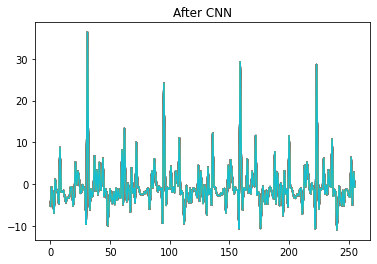

In [167]:
for i in range(50):
    plt.plot(prd[i])
plt.title('After CNN')

Text(0.5, 1.0, 'Raw data')

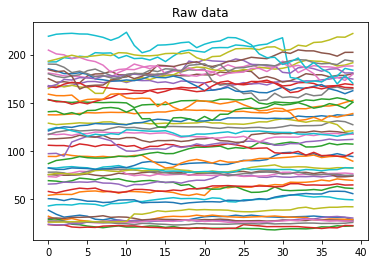

In [168]:
for i in range(50):
    plt.plot(data_dict['FB'][i])
plt.title('Raw data')

In [24]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image


file_names = [os.path.join('gen_v', f) for f in os.listdir('gen_v')]
file_names_no_ext = [int(f.split('.')[0]) for f in os.listdir('gen_v')]

In [20]:
file_names_no_ext

[1, 2, 3, 4, 5, 6, 7, 8]

In [21]:
file_names

['gen_v\\1.png',
 'gen_v\\2.png',
 'gen_v\\3.png',
 'gen_v\\4.png',
 'gen_v\\5.png',
 'gen_v\\6.png',
 'gen_v\\7.png',
 'gen_v\\8.png']

In [25]:
image_li = []
for fil in file_names:
    img = np.array(Image.open(fil))
    #img = np.array(img)
    image_li.append(img)
    h, w, z = (img).shape
    shap = (w, h)
    print(f'h {h}, w {w}, d {z}')

h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4
h 720, w 1440, d 4


In [26]:
"""video = cv2.VideoWriter('video_1.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, (1464, 873))
for fil in file_names:
    img = Image.open(fil)
    img = np.array(img)
    video.write(img)
video.release()
video.release()"""
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
codec = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
video = cv2.VideoWriter('video_3.avi', fourcc, 1, shap, isColor=True)#cv2.VideoWriter_fourcc(*'DIVX'), 10, shap)

for i in range(len(image_li)):
    img = image_li[i][:, :, :3]
    print(img.shape)
    video.write(img)

#cv2.destroyAllWindows()
video.release()

(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)
(720, 1440, 3)


In [ ]:
import cv2

cap = cv2.VideoCapture("output.mp4")
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output5.avi', fourcc, 30, (width, height), isColor=True)

while cap.isOpened():
    # get validity boolean and current frame
    ret, frame = cap.read()

    # if valid tag is false, loop back to start
    if not ret:
        break
    else:
        frame = cv2.resize(frame, (width, height))
        out.write(frame)

cap.release()
out.release()